In [1]:
# Method to find the closest color on the basis of RGB value.
def closest_colour(requested_colour):
        min_colours = {}
        for key, name in webcolors.css3_hex_to_names.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(key)
            rd = (r_c - requested_colour[0]) ** 2
            gd = (g_c - requested_colour[1]) ** 2
            bd = (b_c - requested_colour[2]) ** 2
            min_colours[(rd + gd + bd)] = name
        return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
        try:
            closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
        except ValueError:
            closest_name = closest_colour(requested_colour)
            actual_name = None
        return actual_name, closest_name
    

In [2]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
from sklearn.cluster import KMeans
import operator
import webcolors

mypath='Dominant Color Data Set/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
max_percentage = []
color = []
image_name = []
count = 0
for n in range(0, len(onlyfiles)):
    image_name.append(str(count))
    
    images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
    image = images[n]
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1]),3)
    
    K=4
    clf = KMeans(n_clusters = K)
    clf.fit(image)
    
    label = [0,0,0,0]
    for ele in clf.labels_:
        label[ele] += 1
    label_sum = image.shape[0]
    label = [(float(ele)/label_sum)*100 for ele in label]
    
    # to access max value along with index from a list
    index, value = max(enumerate(label), key=operator.itemgetter(1))
    max_percentage.append(value)
    
    ele = clf.cluster_centers_[index]
    centroid = ele.astype("uint8").tolist()

    actual_name, closest_name = get_colour_name(centroid)
    color.append(closest_name)
    print "image "+str(count)+", Actual colour name:", actual_name, ", closest colour name:", closest_name, ", percentage of it:", value
    count += 1

image 0, Actual colour name: None , closest colour name: lightgray , percentage of it: 29.5768229167
image 1, Actual colour name: None , closest colour name: darkslategray , percentage of it: 48.3447265625
image 2, Actual colour name: None , closest colour name: black , percentage of it: 58.378357418
image 3, Actual colour name: None , closest colour name: olivedrab , percentage of it: 65.4753904549
image 4, Actual colour name: None , closest colour name: snow , percentage of it: 67.0250651042
image 5, Actual colour name: None , closest colour name: grey , percentage of it: 61.07421875
image 6, Actual colour name: None , closest colour name: snow , percentage of it: 58.462890625
image 7, Actual colour name: None , closest colour name: whitesmoke , percentage of it: 70.9723307292
image 8, Actual colour name: None , closest colour name: whitesmoke , percentage of it: 46.36328125
image 9, Actual colour name: None , closest colour name: darkslategray , percentage of it: 53.5237630208
image

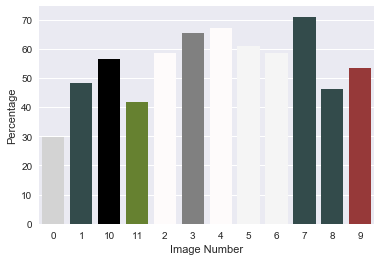

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
df_plot = pd.DataFrame({'Colors':color,'Image Number':image_name,'Percentage':max_percentage})
df_plot
sns.set()
sns.barplot(x='Image Number', y='Percentage', palette=color, data=df_plot)